**<font color='orange'>Завдання**</font>
### <font color='#11aa0055'>Завантажте зображення та реалізуйте до його вертикальних та горизонтальних границь такі фільтри:</font>
* <font size='4' color='fuchsia'>**Собеля**;:</font>
* <font size='4' color='fuchsia'>**Canny**;</font>
* <font size='4' color='fuchsia'>**Робертса** .</font>
#### <font size='4' color='seagreen'>Порівняйте результати цих фільтрів. Обґрунтуйте висновки.</font>


In [1]:
# Required libraries.
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

## <font color='sienna'>Uploading an image</font>

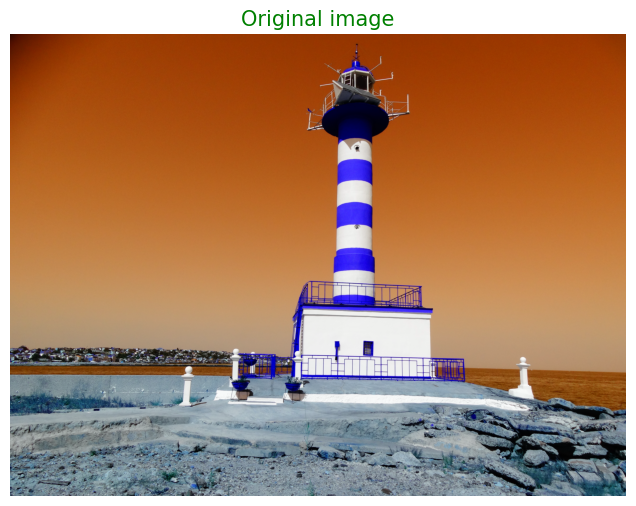

In [2]:
# Reading a color image.
origin_img = cv2.imread('lighthouse.jpg')
plt.figure(figsize=(10, 6))
plt.title('Original image', fontsize=15, color='g')
plt.axis('off')
plt.imshow(origin_img)
plt.show()

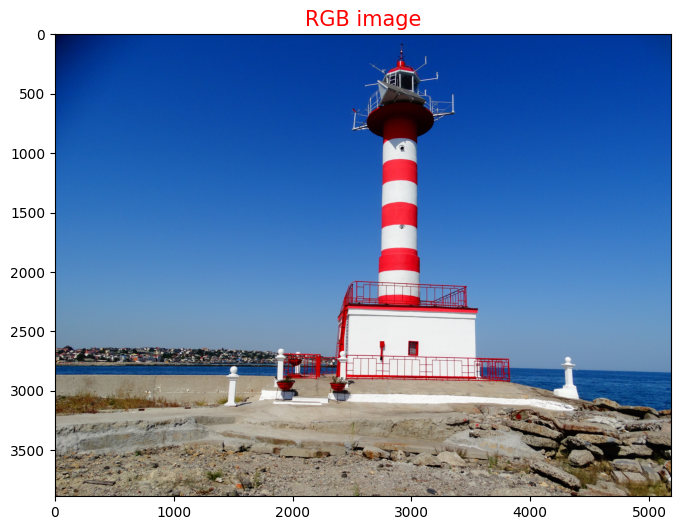

In [3]:
# Converting the origin image to RGB.
RGB_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.title('RGB image', fontsize=15, color='r')
plt.imshow(RGB_img)
plt.show()

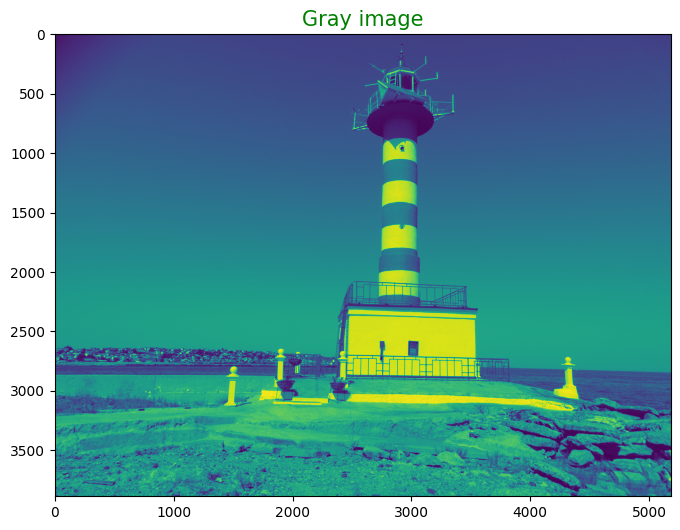

In [4]:
# Converting the origin image to gray.
gray_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 6))
plt.title('Gray image', fontsize=15, color='g')
plt.imshow(gray_img)
plt.show()

# <font color='orange'>Implementing The Sobel Edge Detection</font>

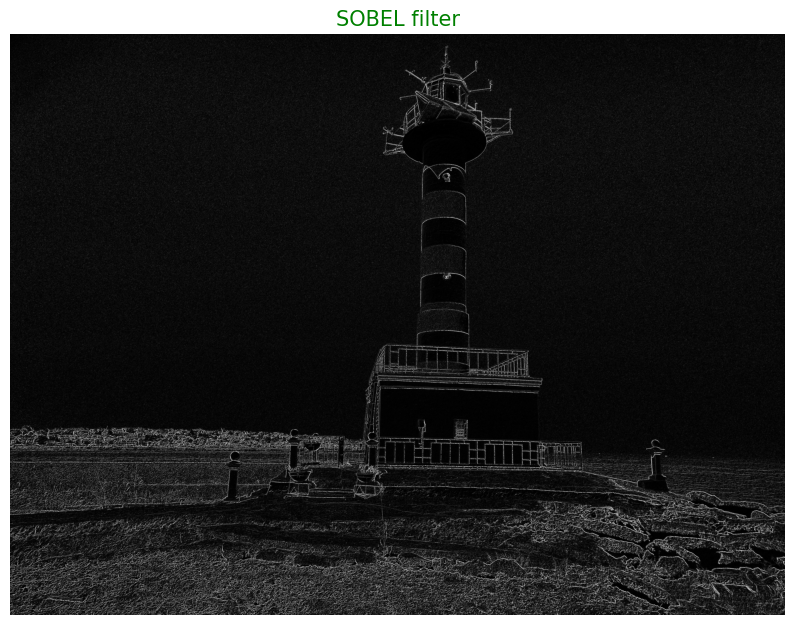

In [5]:
# Making matrix for the Sobel filter.
kernel_X = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel_y = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])

'''Note:
kernel – the 2d matrix we want the image to convolve with.
This function will simply convolute the 2d matrix with the image
at pixel level and produce an output image. '''


# Splitting into X, y edges for applyong the Sobel filter
edges_X = cv2.filter2D(gray_img, -1, kernel_X)
edges_y = cv2.filter2D(gray_img, -1, kernel_y)

# Combining edges.
Sobel_edges = edges_X + edges_y

# Creating a figure for a subplot.
fig = plt.figure(figsize=(10, 8))
plt.title('SOBEL filter', fontsize=15, color='g')
plt.axis('off')

# Display the Sobel filter.
plt.imshow(Sobel_edges, cmap='gray')
plt.show()

# <font color='#00008B'>Implementing The Canny Edge Detection</font>

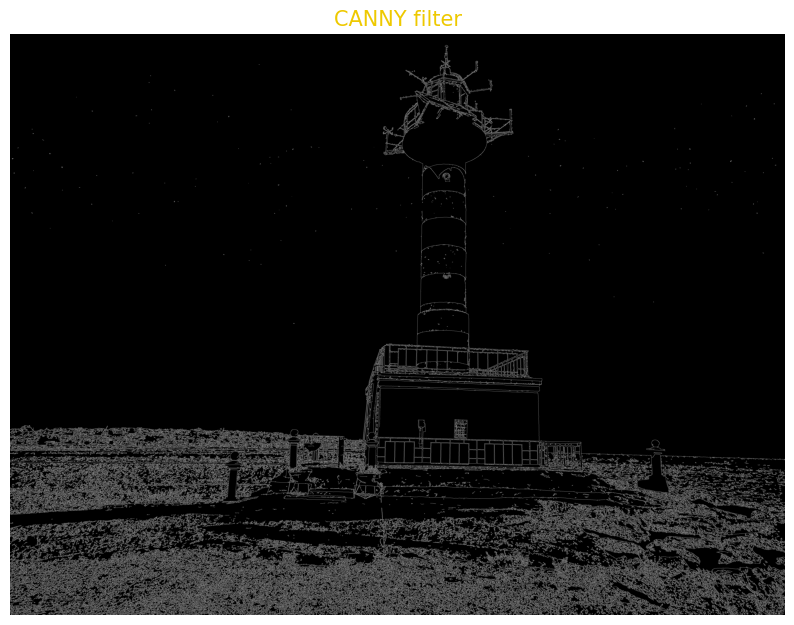

In [8]:
# Applying the Canny filter for edge detection.
Canny_edges = cv2.Canny(gray_img, 50, 150)

# Creating a figure for a subplot.
fig = plt.figure(figsize=(10, 8))
plt.title('CANNY filter', fontsize=15, color='#EEC900')
plt.axis('off')

# Display the Canny filter.
plt.imshow(Canny_edges, cmap='gray')
plt.show()

# cv2.imshow('CANNY filter', Canny_edges)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# <font color='#8470FF'>Implementing Robert's Edge Detection</font>

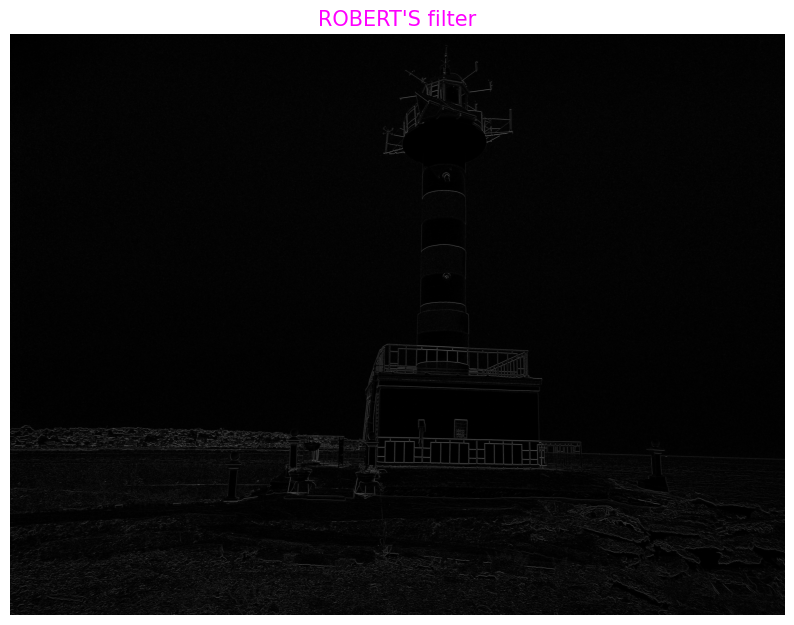

In [9]:
# Making matrix for the Sobel filter.
kernel_X = np.array([
                     [0, 0, 0 ],
                     [0, 1, 0 ],
                     [0, 0,-1 ]
                     ])
kernel_y = np.array([
                     [0, 0, 0 ],
                     [0, 0, 1 ],
                     [0,-1, 0 ]
                     ])



# Splitting into X, y edges for applyong the Robert\'s filter
edges_X = cv2.filter2D(gray_img, -1, kernel_X)
edges_y = cv2.filter2D(gray_img, -1, kernel_y)

# Combining edges.
Roberts_edges = edges_X + edges_y


# Creating a figure for a subplot.
fig = plt.figure(figsize=(10, 8))
plt.title('ROBERT\'S filter', fontsize=15, color='magenta')
plt.axis('off')

# Display the Sobel filter.
plt.imshow(Roberts_edges, cmap='gray')
plt.show()

# <font color='darkblue'>Comparison of filters</font>

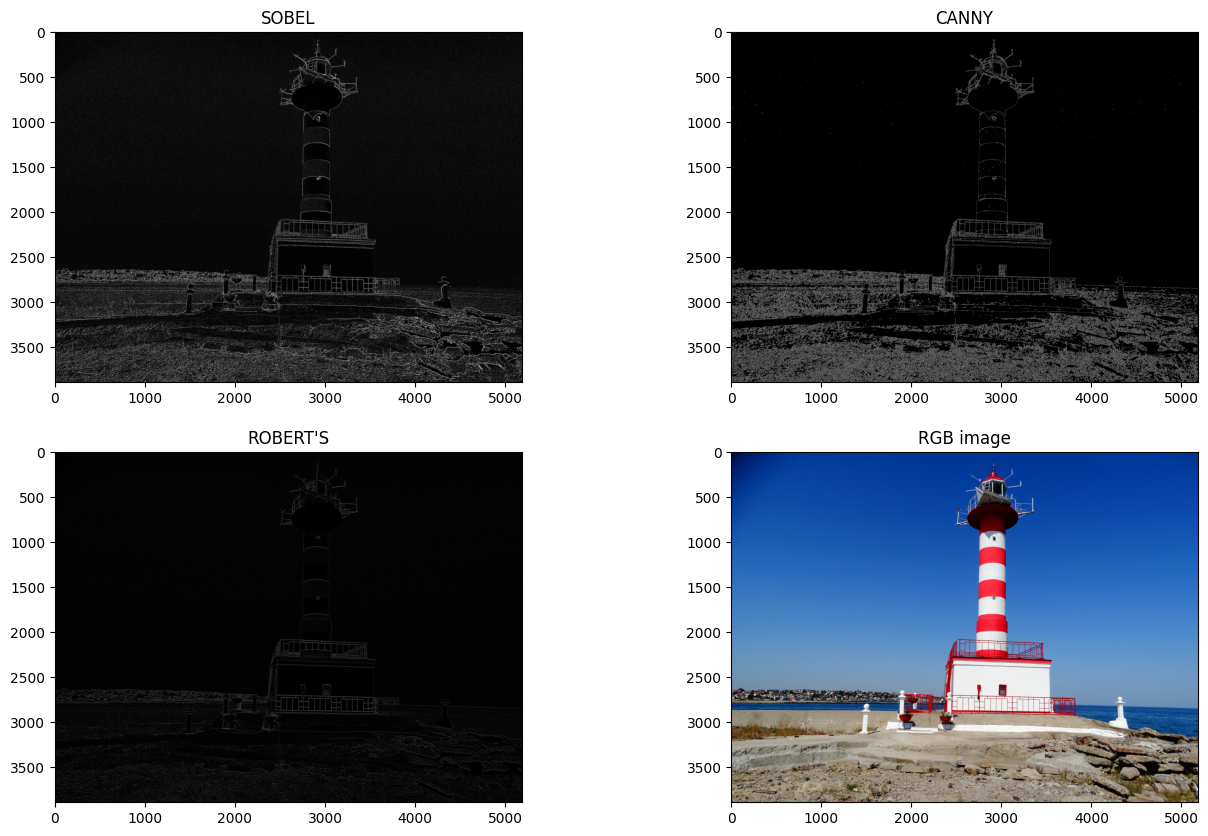

In [10]:
# Creating a figure for a subplot.
fig = plt.figure(figsize=(16, 10))

# Subplot and Title for the SOBEL filter.
ax1 = fig.add_subplot(221)  # top left side.
ax1.title.set_text('SOBEL')

# Subplot and Title for the CANNY filter
ax2 = fig.add_subplot(222)  # top right side.
ax2.title.set_text('CANNY')

# Subplot and Title for the ROBERT\'S filter.
ax3 = fig.add_subplot(223)  # bottom left side.
ax3.title.set_text('ROBERT\'S')

# Subplot and Title for the RGB image.
ax4 = fig.add_subplot(224)  # bottom right side.
ax4.title.set_text('RGB image')


# Display the subplot.
ax1.imshow(Sobel_edges, cmap='gray')
ax2.imshow(Canny_edges, cmap='gray')
ax3.imshow(Roberts_edges, cmap='gray')
ax4.imshow(RGB_img)
plt.show()

## <font color='darkblue'>Після порівняння цих фільтрів можу зробити такий висновок:</font>

<font color='#8E388E'>**Sobel** і **Canny** саме на цьому фото виявили границі як самого головного об’єкта (маяка), так і предметів, які його оточують. Ці два фільтри менш чутливі до "шумів", що видно на фото неозброєним оком.
**Robert\'s** - чутливий до шумів: згладив на фото "шуми" з другорядних об’єктів і зобразив тільки границі самого маяка (якщо уважно придивитися на фото з більшим масштабом).</font>

* <font color='forestgreen'>**Sobel** фільтр – ефективний, коли границі зображення чітко окреслені.</font>
* <font color='forestgreen'>**Canny** фільтр – виявляє границі як "шумів", так і головного об’єкта; краї виходять більш згладженими.</font>
*   <font color='forestgreen'>**Robert\'s** фільтр – зробив зображення більш розмитим, не дуже точно визначив границі головного об’єкта.</font>